In [28]:
import requests
import json
from collections import Counter
import random

#import matplotlib.pyplot as plt
#import seaborn as sns

#from sklearn import preprocessing
#from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#from sklearn.decomposition import PCA
#from sklearn.pipeline import Pipeline

import pandas as pd # data preprocessing
import numpy as np # linear algebra

#import tensorflow as tf
#from tensorflow.keras import layers
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.preprocessing import text

# Train a first Neural Network
El objetivo del siguiente notebook es entrenar una red neuronal simple para predecir dominios del dataset.

A continuación se muestra la arquitectura de la red a entrenar.


![Google's logo](https://www.google.com/images/logos/google_logo_41.png)

## Download the dataset
El siguiente código descarga el dataset ubicado en Google Drive y lo descomprime 

In [29]:
#dataset_url = 'https://drive.google.com/file/d/1XbasZMZzSmMUbji1Sslg4vT5MBiIhyFO/view?usp=sharing'

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

download_file_from_google_drive('1nzvm--XkmhjHgngNdjaemFIViXekaVWx', 'sm_dataset.zip')
!unzip 'sm_dataset.zip'

Archive:  sm_dataset.zip
  inflating: dataset.csv             
   creating: __MACOSX/
  inflating: __MACOSX/._dataset.csv  


## Load the dataset using pandas
The dataset is a csv file separated with tabs

In [32]:
df = pd.read_csv('dataset.csv', sep='\t')

## Explore the data

Let's do some checks to see if the data makes sense

In [59]:
df.head()

,domain_id,title,category_id
0,SANDALS_AND_FLIP_FLOPS,Sandalias Con Plataforma Mini Viamo Usadas Num...,0
1,SPARK_PLUG_WIRESETS,Cable Para Bujia Prestolite (1127) Peugeot 405...,1
2,MOTORCYCLE_HANDLEBAR_GRIPS,Protectores Mda Monster Zanella Zb D 110 4t 20...,2
3,MOTORCYCLE_TIRES,Cubierta Moto 250 17 Hd01-1 Okinoi Okinoi - 110,3
4,AUTOMOTIVE_FILTER_KITS,Kit De Filtros Wega Toyota Hilux 2011,4


First, find how many classes we have in the dataset. This classes will be the output of the Neural Network

In [40]:
print("Número de classes:", len(df.domain_id.unique()))

Número de classes: 100


¿How many items do we have in the dataset?

In [38]:
print("Número de ejemplos:", len(df))

Número de ejemplos: 464092


Count how many items we have per class and:
 1. Make a line plot
 2. Plot a histogram distribution to see how balanced are the classes

(0, 5500)

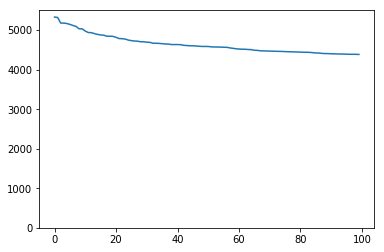

In [63]:
plt = (df.groupby('domain_id')
             .count()
             .sort_values('title', ascending=False)
             .reset_index()[['domain_id','title']]
             .rename(columns={"title":"counts"}))['counts'].plot.line()
plt.set_ylim(0,5500)

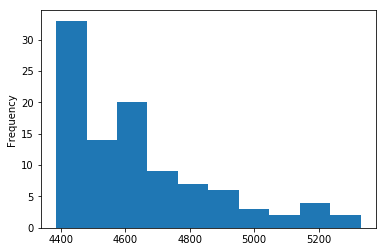

In [53]:
(df.groupby('domain_id')
             .count()
             .reset_index()[['domain_id','title']]
             .rename(columns={"title":"counts"}))['counts'].plot.hist()

## Prepare the data

### Tokenization and Vectorization

Create a vocabulary of words.

That is, given the text of the dataset, return a dict of word -> index 

["Kit De Filtros Wega Toyota Hilux 2011", "Protectores Mda Monster", ...]

{"kit":0, "de":1, ... ,"monster":121, ...}

In [62]:
# Vectorization parameters
# Limit on the number of features. We use the top 20K features.
TOP_K = 20000

# Limit on the length of text sequences. Sequences longer than this
# will be truncated.
MAX_SEQUENCE_LENGTH = 500

def sequence_vectorize(train_texts, val_texts):
    """Vectorizes texts as sequence vectors.

    1 text = 1 sequence vector with fixed length.

    # Arguments
        train_texts: list, training text strings.
        val_texts: list, validation text strings.

    # Returns
        x_train, x_val, word_index: vectorized training and validation
            texts and word index dictionary.
    """
    # Create vocabulary with training texts.
    tokenizer = text.Tokenizer(num_words=TOP_K)
    tokenizer.fit_on_texts(train_texts)

    # Vectorize training and validation texts.
    x_train = tokenizer.texts_to_sequences(train_texts)
    x_val = tokenizer.texts_to_sequences(val_texts)

    # Get max sequence length.
    max_length = len(max(x_train, key=len))
    if max_length > MAX_SEQUENCE_LENGTH:
        max_length = MAX_SEQUENCE_LENGTH

    # Fix sequence length to max value. Sequences shorter than the length are
    # padded in the beginning and sequences longer are truncated
    # at the beginning.
    x_train = sequence.pad_sequences(x_train, maxlen=max_length)
    x_val = sequence.pad_sequences(x_val, maxlen=max_length)
    return x_train, x_val, tokenizer.word_index

### Vectorizer the features using Bag of Words

## Build the model

## Train the model

## Analyze the statistics